In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

import transformer_decoder_training.training_helper_functions as helper

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:10<00:00, 100.41it/s]


Processed 1038 of 1038 files
The train loader has 409 batches with a size of 17
The model is trained on approximately 6953 sequences
Initializing Focal Loss with alpha=0.75 and gamma=2.0
Start training Model with following parameters:
model_project_name: transformer_2.0
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=1024, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-7): 8 x TransformerBlock(
      (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
      )
      (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=1024, out_features=4096, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=4096, out_features=1024, bias=True)
      )
    )
  )
  (fc_out): Linear(in_featu

Epoch: 1, Train loss: 0.051, Val loss: 0.035, Epoch time = 181.488s


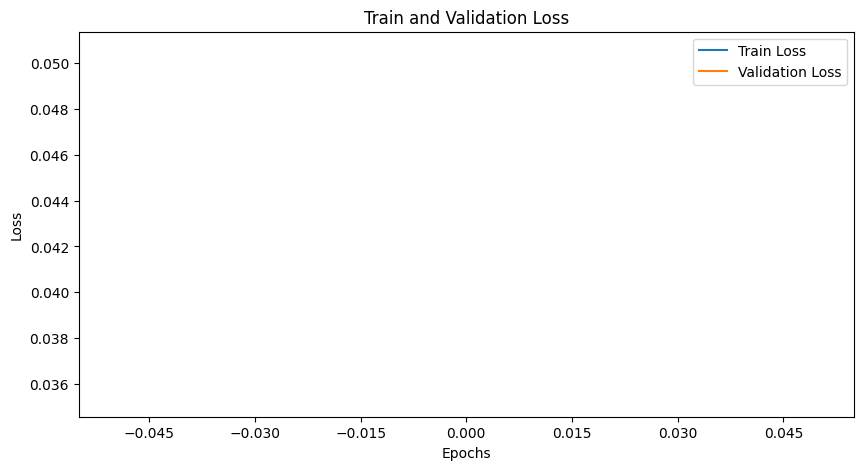

Epoch: 2, Train loss: 0.035, Val loss: 0.034, Epoch time = 178.523s


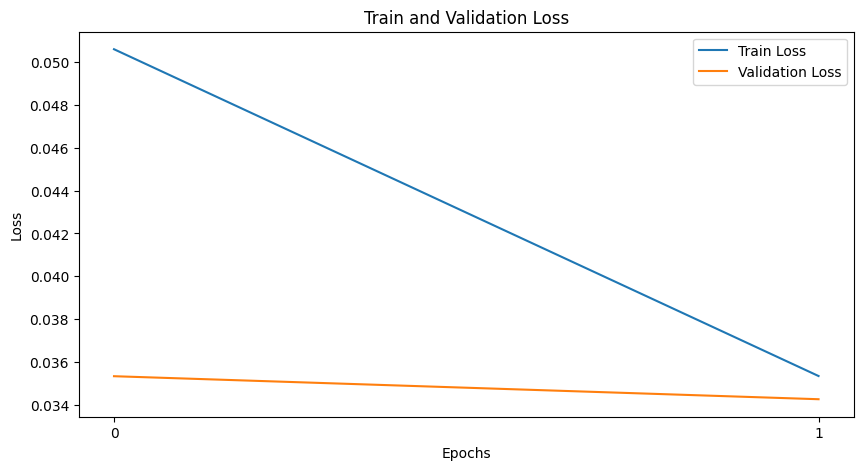

Epoch: 3, Train loss: 0.035, Val loss: 0.034, Epoch time = 175.485s


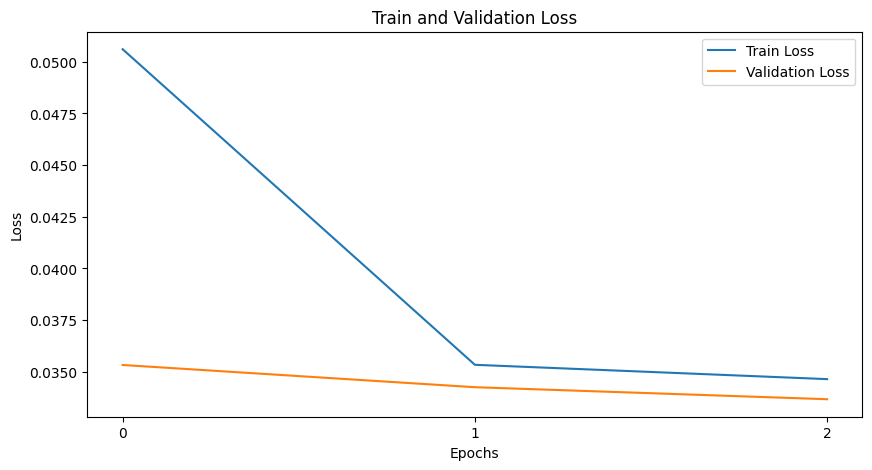

Epoch: 4, Train loss: 0.034, Val loss: 0.033, Epoch time = 177.608s


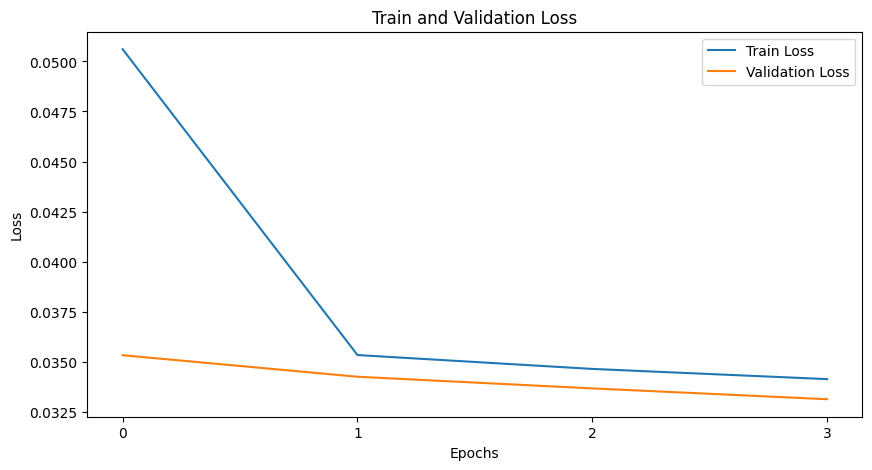

Epoch: 5, Train loss: 0.033, Val loss: 0.032, Epoch time = 175.504s


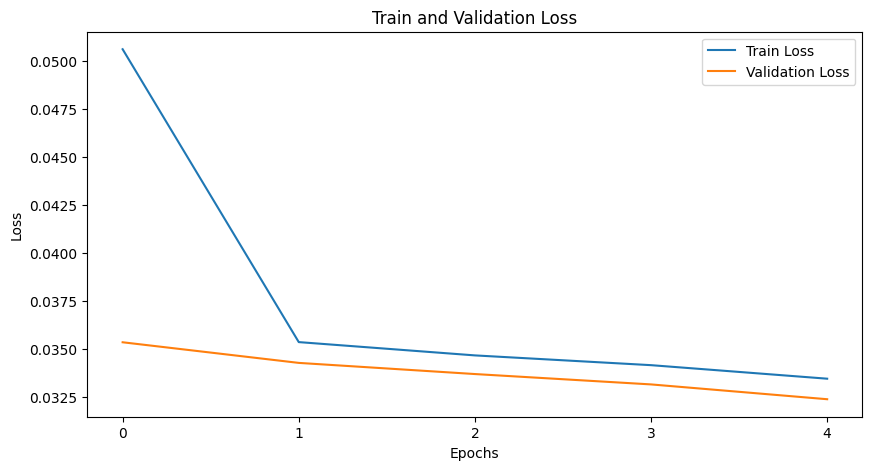

Epoch: 6, Train loss: 0.033, Val loss: 0.032, Epoch time = 177.793s


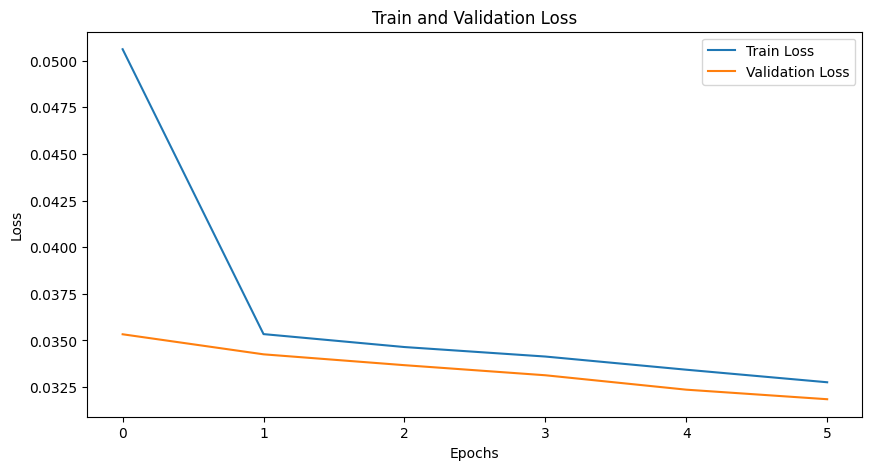

Epoch: 7, Train loss: 0.032, Val loss: 0.032, Epoch time = 180.036s


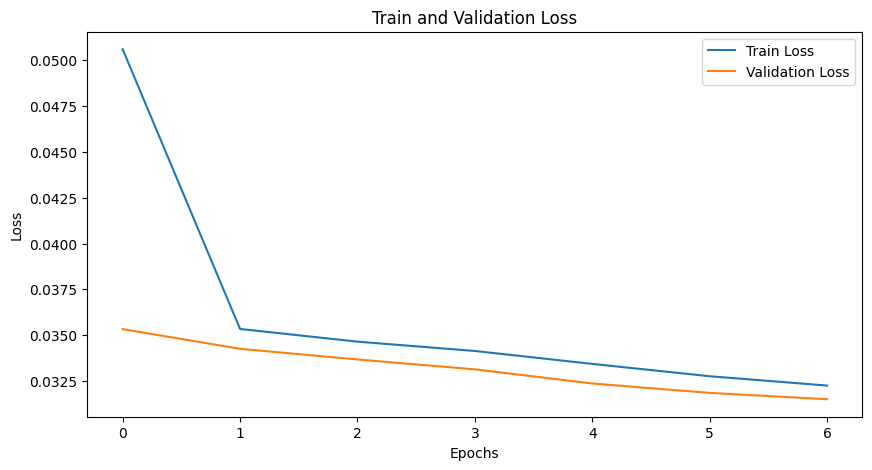

Epoch: 8, Train loss: 0.032, Val loss: 0.031, Epoch time = 179.054s


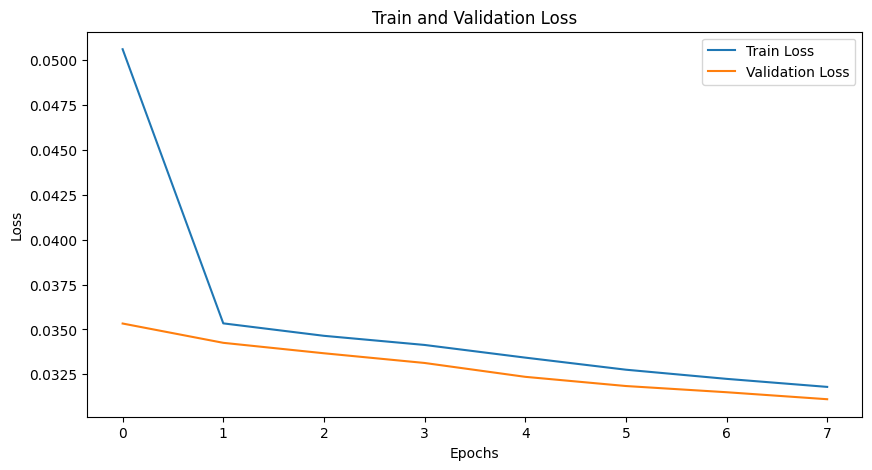

Epoch: 9, Train loss: 0.031, Val loss: 0.031, Epoch time = 178.854s


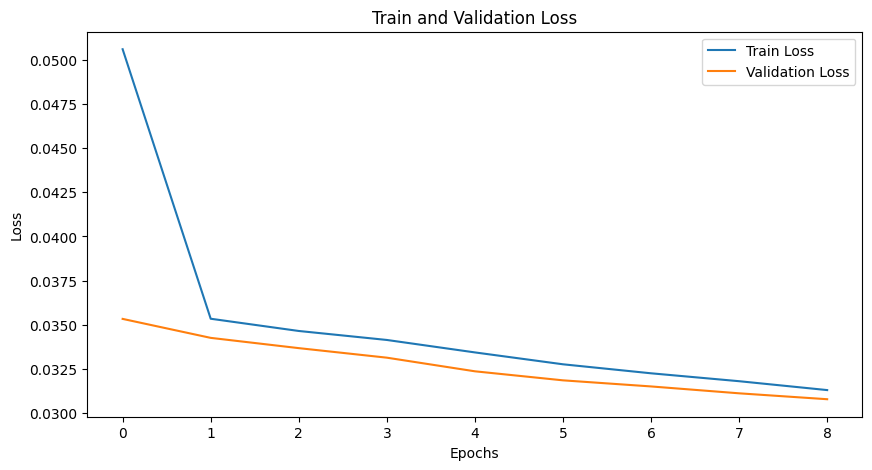

Epoch: 10, Train loss: 0.031, Val loss: 0.030, Epoch time = 178.928s


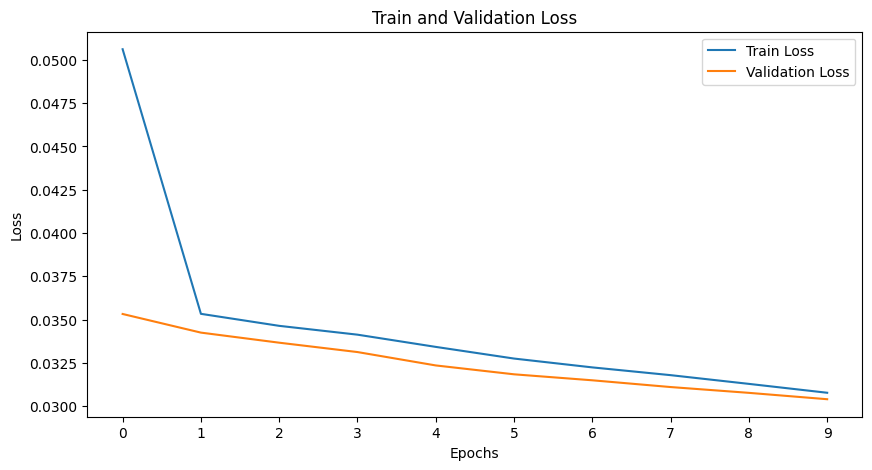

Epoch: 11, Train loss: 0.030, Val loss: 0.030, Epoch time = 178.850s


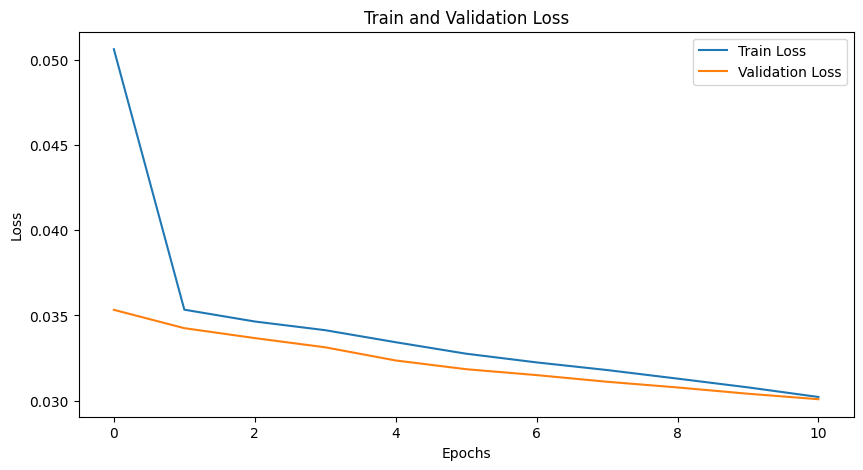

Epoch: 12, Train loss: 0.030, Val loss: 0.030, Epoch time = 178.839s


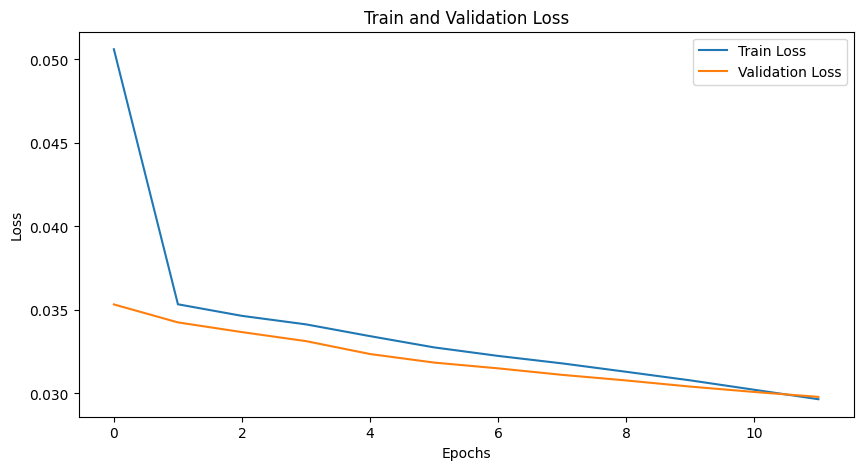

Epoch: 13, Train loss: 0.029, Val loss: 0.030, Epoch time = 178.893s


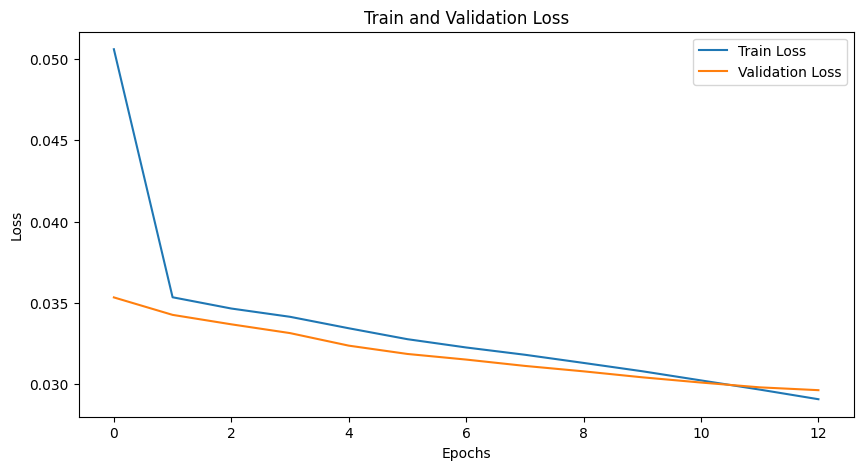

Epoch: 14, Train loss: 0.028, Val loss: 0.029, Epoch time = 178.935s


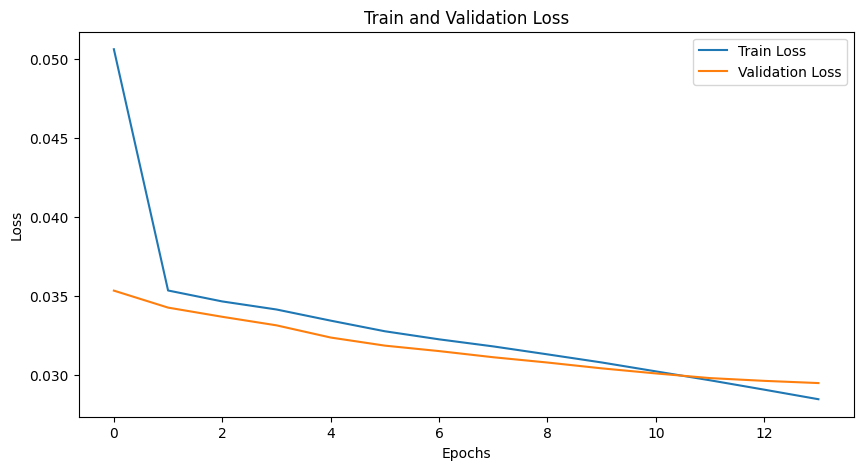

Epoch: 15, Train loss: 0.028, Val loss: 0.030, Epoch time = 178.886s


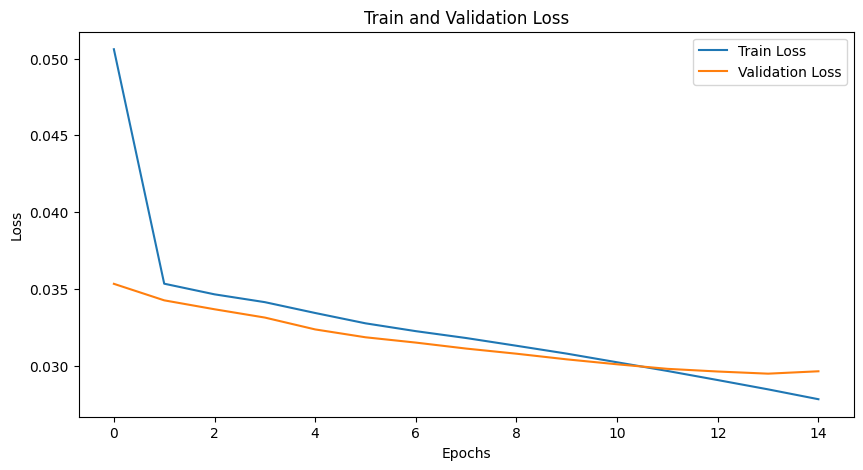

Epoch: 16, Train loss: 0.027, Val loss: 0.030, Epoch time = 178.840s


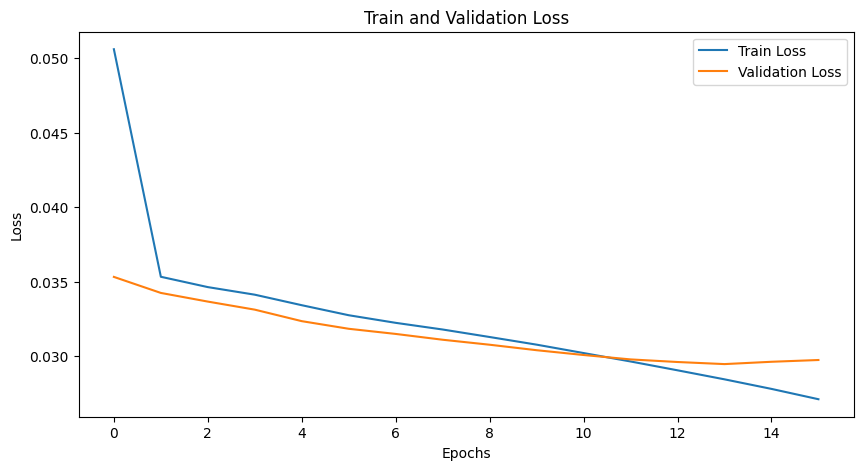

Epoch: 17, Train loss: 0.026, Val loss: 0.030, Epoch time = 178.882s


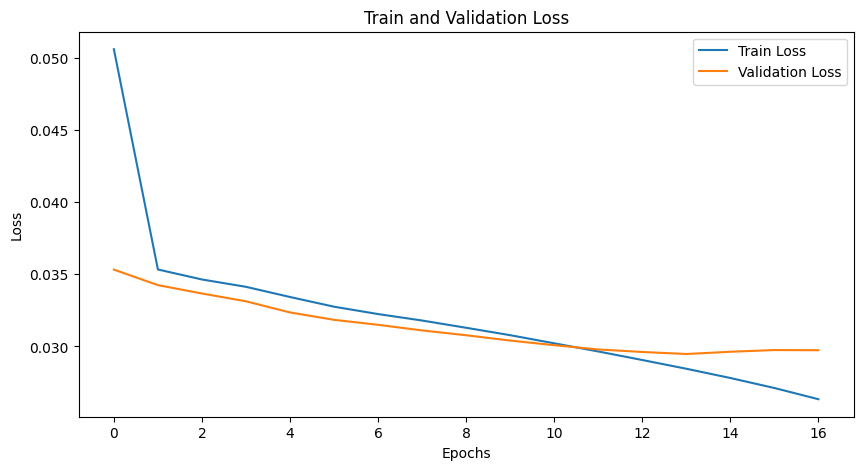

Epoch: 18, Train loss: 0.026, Val loss: 0.030, Epoch time = 178.895s


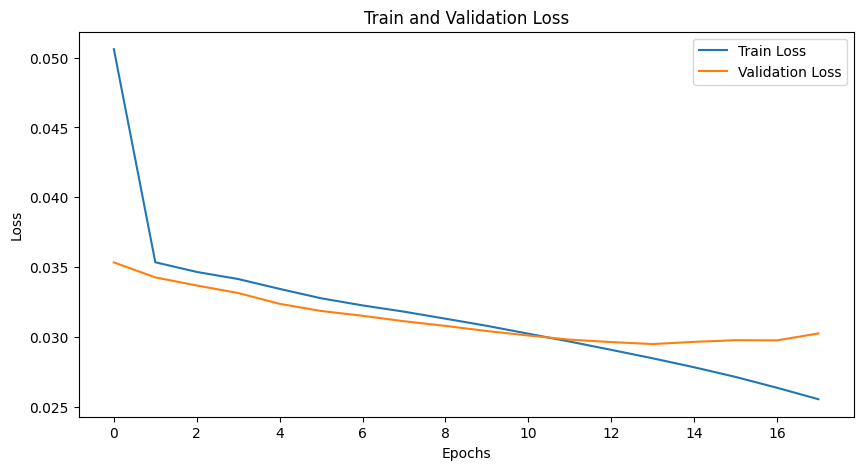

Epoch: 19, Train loss: 0.025, Val loss: 0.031, Epoch time = 179.168s


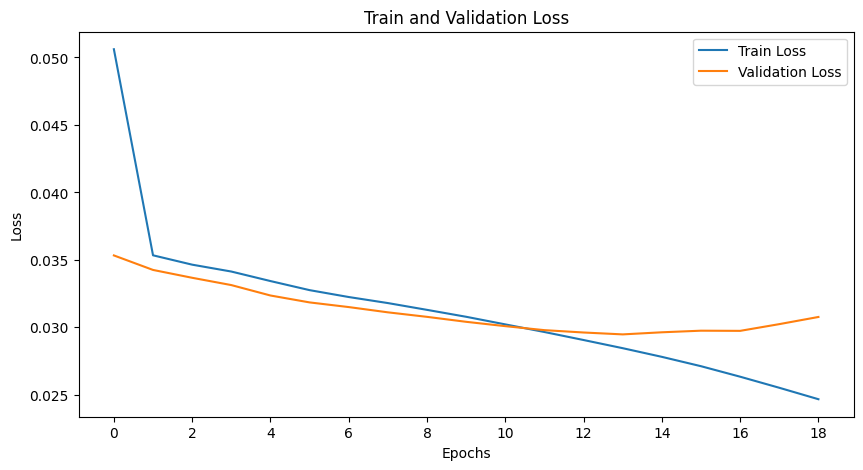

Training:   2%|▏         | 7/409 [00:03<02:54,  2.30it/s]

KeyboardInterrupt: 

In [3]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_2.0"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 1024
config["model_params"]["num_layers"] = 8
config["model_params"]["num_heads"] = 8
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 100
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "FocalLoss"
config["training_params"]["loss_fn_parameters"]["alpha"] = 0.75
config["training_params"]["loss_fn_parameters"]["gamma"] = 2.0

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.1
config["training_data_params"]["batch_size"] = 17
config["training_data_params"]["sequence_length"] = 1024
config["training_data_params"]["stride"] = 256
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)